# Low Level Neural Network Implementation for Digit Identification

This neural network is implemented using Numpy, Pandas and pure linear algebra + calculus.

### 1. Importing Libraries

In [2]:
!pip install numpy
!pip install pandas
!pip install matplotlib

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2. Dataset Preprocessing

In [4]:
# Only extracting digits 1 and 5 for simplicity
def binarize(ifile):
    
    output_filename = "output." + ifile.split(".")[1]
    write_file = open(output_filename, 'w')

    read_file = open(ifile, 'r')
    lines = read_file.readlines()

    for line in lines:
        # print(line[0])
        if int(line[0]) == 1:
            # print("is 1")
            newline_list = line.split(' ')
            newline_list[0] = "-1"
            newline = ' '.join(newline_list)
            write_file.write(newline)
        if int(line[0]) == 5:
            # print("is 5")
            newline_list = line.split(' ')
            newline_list[0] = "1"
            newline = ' '.join(newline_list)
            write_file.write(newline)

# Normalizing based on pixel row intensity and symmetry
def generate_input_output(ofile):
    read_file = open(ofile, 'r')
    lines = read_file.readlines()

    output = []
    input = []

    for line in lines:
        newline_list = line.split(' ')
        if newline_list[0] == "-1":
            
            intensity = 0
            for i in range(1, len(newline_list)-1):
                intensity += float(newline_list[i])
            
            symmetry = 0
            right_ptr = len(newline_list)-2
            for left_ptr in range(1, int(len(newline_list)/2)):
                symmetry += abs(float(newline_list[left_ptr]) - float(newline_list[right_ptr]))
                right_ptr -= 1
            
            output.append(int(newline_list[0]))
            input.append([intensity, symmetry])
            
        if newline_list[0] == "1":
            
            intensity = 0
            for i in range(1, len(newline_list)-1):
                intensity += float(newline_list[i])
            
            symmetry = 0
            right_ptr = len(newline_list)-2
            for left_ptr in range(1, int(len(newline_list)/2)):
                symmetry += abs(float(newline_list[left_ptr]) - float(newline_list[right_ptr]))
                right_ptr -= 1
            
            output.append(int(newline_list[0]))
            input.append([intensity, symmetry])
    
    return input, output

### 3. Forward Propagation

In [5]:
def forward_propagation(input, hidden_units, W1, W2):
    x0 = np.array(input)  # Necessary for back propagation
    
    # l = 1
    s1 = np.zeros(hidden_units)
    for i in range(hidden_units):
        s = np.dot(input, W1[i])
        s1[i] = s
    
    x1 = np.tanh(s1)
    x1 = np.insert(x1, 0, 1)  # Adding bias neuron
    
    # l = 2
    s2 = np.dot(W2, x1.T)
    
    x2 = np.tanh(s2)
    
    hx = x2
    xl = [x0, x1, x2]  # d(l)+1, Collection of all output vectors
    sl = [s1, s2]  # d(l), Collection of all signal vectors
    
    return hx, xl, sl

### 4. Backward Propagation

In [6]:
def back_propagation(hx, xl, sl, W2, output):
    # Sensitivity vector calculation
    theta_s2 = 1 - np.square(hx)
    delta2 = 2 * (hx - output) * theta_s2
    
    theta_s1 = 1 - np.square(xl[1][1:])
    delta1 = theta_s1 * np.dot(W2[:,1:].T, delta2)
    
    # Partial derivative calculation
    de_dW1 = np.outer(delta1, xl[0])
    de_dW2 = np.outer(delta2, xl[1])
    
    return de_dW1, de_dW2

### 5. Calculating Gradient Error for Stochastic Gradient Descent Optimization

In [7]:
def error_gradient_calculation(input, hx, W1, W2, output, de_dW1, de_dW2):
    N = len(input[0])

    Ein = ((hx - output)**2)/N
    
    G1 = de_dW1/N
    G2 = de_dW2/N
    
    gradient = [G1, G2]
    
    return Ein, gradient

### 6. Update Weight

In [8]:
def update_weight(W1, W2, gradient):
    
    # print("W1 shape:", W1.shape, "Gradient[0] shape:", gradient[0].shape)
    # print("W2 shape:", W2.shape, "Gradient[1] shape:", gradient[1].shape)
    
    learning_rate = 0.01 # Referenced textbook
    W1 -= learning_rate*gradient[0]
    W2 -= learning_rate*gradient[1]
    return W1, W2 

### 7. Neural Network Iterative Training

In [9]:
def neural_network(input, output, hidden_units, epoch):
    
    input_with_bias = np.insert(input, 0, 1, axis=1) # Adding bias neuron to input neurons
    
    np.random.seed(0)
    
    W1 = np.random.randn(hidden_units, input_with_bias.shape[1])
    W2 = np.random.randn(1, hidden_units+1) # +1 accounts for bias neuron
    
    error_list = []
    
    for i in range(epoch):
        error = 0
        
        random_index = np.random.randint(0, len(input))
        
        input_value = input_with_bias[random_index]
        output_value = output[random_index]

        hx, xl, sl = forward_propagation(input_value, hidden_units, W1, W2)
        # print("xl: " + str(xl))
        de_dW1, de_dW2 = back_propagation(hx, xl, sl, W2, output_value)
        error, gradient = error_gradient_calculation(input, hx, W1, W2, output_value, de_dW1, de_dW2)
        W1, W2 = update_weight(W1, W2, gradient)
            
        error = error/len(input_value)
        error_list.append(error)
        print(f"Epoch {i+1} average error: {error}")
        
    return W1, W2, error_list

### 8. Running the Training Phase

This step combines all of the previous functions to process the data, train the neural network, and display the average error per epoch as the neural network trains.

[-28.605000000000008, 130.351]
1
Epoch 1 average error: [0.65955466]
Epoch 2 average error: [0.53176256]
Epoch 3 average error: [0.52229714]
Epoch 4 average error: [0.51146621]
Epoch 5 average error: [0.53991107]
Epoch 6 average error: [0.66615002]
Epoch 7 average error: [0.53130106]
Epoch 8 average error: [0.66079325]
Epoch 9 average error: [0.66076869]
Epoch 10 average error: [0.66576257]
Epoch 11 average error: [0.6662293]
Epoch 12 average error: [0.50645699]
Epoch 13 average error: [0.66074599]
Epoch 14 average error: [0.66072104]
Epoch 15 average error: [0.52434482]
Epoch 16 average error: [0.49780967]
Epoch 17 average error: [0.66034835]
Epoch 18 average error: [0.6602454]
Epoch 19 average error: [0.51703932]
Epoch 20 average error: [0.65990192]
Epoch 21 average error: [0.50471123]
Epoch 22 average error: [0.49286319]
Epoch 23 average error: [0.65943467]
Epoch 24 average error: [0.6593357]
Epoch 25 average error: [0.49619531]
Epoch 26 average error: [0.65773273]
Epoch 27 average 

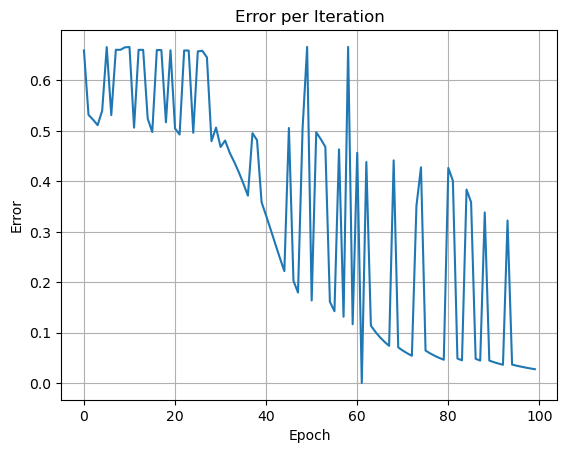

In [11]:
binarize("ZipDigits.train")
input, output = generate_input_output("output.train")
print(input[0])
print(output[0])
hidden_units = 5
epoch = 100
W1, W2, error_list = neural_network(input, output, hidden_units, epoch)
# print(W1)
# print(W2)

plt.plot(error_list)  

plt.xlabel('Epoch')  
plt.ylabel('Error')  
plt.title('Error per Iteration') 
plt.grid(True) 

plt.show()